In [1]:
# Notebook configuration

ALGODIRECT_HNSW_RESULTS_DIR = "./results/algodirect/jacob/redo"
GSI_HNSW_RESULTS_DIR =  "./results/algodirect/sv7-apu11/gwilliams"
LATEST_FVS_RESULTS_DIR = "./results/fvs"

# NOTE: change this path to your local NAS1 mount path
#GT_DIR = "/Users/sabrina/mnt/nas1/fvs_benchmark_datasets" 
GT_DIR = "/home/sabrina/nas1/fvs_benchmark_datasets"

In [2]:
# Python imports

import os
import json
import re

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget
import ipywidgets as widgets

In [3]:
# Prechecks

if not os.path.exists(ALGODIRECT_HNSW_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % ALGODIRECT_HNSW_RESULTS_DIR)

if not os.path.exists(GSI_HNSW_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % GSI_HNSW_RESULTS_DIR)

if not os.path.exists(LATEST_FVS_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % LATEST_FVS_RESULTS_DIR)

if not os.path.exists(GT_DIR):
    raise Exception("Cannot find %s.  Did you mount NAS1 locally and change the config above?" % GT_DIR)

In [4]:
#
# Load the latest FVS benchmark data
#

In [4]:
# Load all the FVS benchmarks into one data frame

csvs = []

# locate a .csv files in the results data dir
for root, dir, files in os.walk(LATEST_FVS_RESULTS_DIR):
    #print(root,dir)
    for file in files:
        
        if file.endswith(".csv"):
            fpath = os.path.join(root, file)
            csvs.append(fpath)
if len(csvs)==0:
    raise Exception("No CSVs found!")
print("found %d CSV files" % len(csvs))

# load all data frames
dfs = []
for csv in csvs:
    df = pd.read_csv(csv)
    if csv.find("apu11")>=0:
        df['host']="apu11"
    elif csv.find("apu12")>=0:
        df['host']="apu12"
    else:
        raise Exception("host machine not known for" ,csv )
    dfs.append(df)

# concat into one master
print("Concatenating into one master dataframe...")
df_fvs = pd.concat( dfs )
print("There are %d rows" % df_fvs.shape[0])
df_fvs.head(10)

found 74 CSV files
Concatenating into one master dataframe...
There are 74074 rows


,type,fvs_version,allocationid,datasetid,dataset_path,queries_path,bits,ts_start,ts_train_start,ts_train_end,ts_train_walltime,ts_query_start,ts_query_end,ts_query_walltime,response,recall,host
0,train,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,/mnt/nas1/fvs_benchmark_datasets/deep-10M.npy,NaN,128.0,Thu Sep 14 21:48:22 2023,1.694753e+09,1.694754e+09,1178.232852,NaN,NaN,NaN,NaN,NaN,apu12
1,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__0.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.034183,0.028239,1.0,apu12
2,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__1.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.032082,0.026690,0.8,apu12
3,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__2.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.026284,0.021634,0.9,apu12
4,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__3.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.026364,0.022113,0.9,apu12
5,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__4.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.023939,0.019321,1.0,apu12
6,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__5.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.025702,0.021230,1.0,apu12
7,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__6.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.023537,0.018992,1.0,apu12
8,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__7.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.025308,0.020786,0.9,apu12
9,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__8.npy,NaN,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.028385,0.023743,1.0,apu12


In [6]:
#
# Please don't change the rest of this notebook!
#

In [7]:
#
# Algo Direct - HNSW
#

In [5]:
# Accumulate algodirect results by recursively walking the results dir

csvs = []
gsi_csvs = []

# locate a .json files in the results data dir
for root, dir, files in os.walk(ALGODIRECT_HNSW_RESULTS_DIR):
    for file in files:
        
        if file.endswith(".csv"):
            fpath = os.path.join(root, file)
            csvs.append(fpath)

for root, dir, files in os.walk(GSI_HNSW_RESULTS_DIR):
    for file in files:
        if file.endswith(".csv") and "flat" not in file:
            fpath = os.path.join(root, file)
            gsi_csvs.append(fpath)
#print(csvs)

In [6]:
# Load all gsi apu csv results into one dataframe

gsi_dfs = []

for csvfile in gsi_csvs:
    # parse the file name for info
    _df = pd.read_csv(csvfile)
    parts = os.path.basename(csvfile).split("_")
    print(parts)
    if parts[2]=="work": continue
    _df['implementation']=parts[1]
    _df['machine']=parts[2]
    _df['dset']="deep-"+parts[3]  # TODO: make sure to change for different base dataset
    # skip idx 4 because it's cluster or flat
    _df['numrecs']=int(parts[5])
    _df['bits']=int(parts[6])
    _df['importtime']=float(parts[7])
    _df['walltime']=float(parts[8][:-4])
    gsi_dfs.append(_df)

gsi_df = pd.concat(gsi_dfs)
print(df.columns, df.shape)

['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '1000000', '512', '2.965147', '2.965195.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '10000000', '256', '20.314287', '20.314335.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '2000000', '256', '4.645472', '4.645534.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '1000000', '64', '2.233583', '2.233616.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '50000000', '256', '96.744488', '96.744533.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '10000000', '768', '18.093729', '18.093798.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '20000000', '256', '35.068892', '35.068952.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '250000000', '128', '13419.462200', '13419.462247.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '100000000', '256', '6602.383349', '6602.383382.csv']
['algodirect', 'g

In [7]:
# Load all hnsw csv results into one dataframe

dfs = []

for csvfile in csvs:
    # parse the file name for info
    _df = pd.read_csv(csvfile)
    parts = os.path.basename(csvfile).split("_")
    print(parts)
    if parts[2]=="work": continue
    _df['implementation']=parts[1]
    _df['machine']=parts[2]
    _df['dset']="deep-"+parts[3]  # TODO: make sure to change for different base dataset
    _df['numrecs']=int(parts[4])
    _df['ef']=int(parts[5])
    _df['importtime']=float(parts[6])
    _df['walltime']=float(parts[7][:-4])
    dfs.append(_df)

df = pd.concat(dfs)
# print(df.columns, df.shape)

['algodirect', 'hnsw', 'fractals-1', '500M', '500000000', '512', '1556733.981435', '1556876.961668.csv']
['algodirect', 'hnsw', 'fractals-1', '5M', '5000000', '64', '3604.794938', '3605.949178.csv']
['algodirect', 'hnsw', 'fractals-1', '10K', '10000', '128', '1.374504', '1.376540.csv']
['algodirect', 'hnsw', 'fractals-1', '50M', '50000000', '256', '71453.970359', '71468.271853.csv']
['algodirect', 'hnsw', 'fractals-1', '2M', '2000000', '512', '846.896871', '847.230758.csv']
['algodirect', 'hnsw', 'fractals-1', '500M', '500000000', '256', '1556733.981435', '1556876.961668.csv']
['algodirect', 'hnsw', 'fractals-1', '1M', '1000000', '512', '523.456931', '523.742372.csv']
['algodirect', 'hnsw', 'fractals-1', '1M', '1000000', '256', '523.456931', '523.742372.csv']
['algodirect', 'hnsw', 'fractals-1', '100M', '100000000', '64', '141989.792003', '142015.029860.csv']
['algodirect', 'hnsw', 'fractals-1', '500M', '500000000', '64', '1556733.981435', '1556876.961668.csv']
['algodirect', 'hnsw', '

In [8]:
# Show the data

pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df.head()

,ts,q_index,search_time,inds,implementation,machine,dset,numrecs,ef,importtime,walltime
0,1692461468,0,0.055170,389036097-81481139-202094184-422457723-3742141-167532067-252222141-209093816-94128829-487117365,hnsw,fractals-1,deep-500M,500000000,512,1.556734e+06,1.556877e+06
1,1692461468,1,0.081868,237397391-137200318-258726677-444098004-135631906-439751443-415002084-405505968-28865574-447841041,hnsw,fractals-1,deep-500M,500000000,512,1.556734e+06,1.556877e+06
2,1692461468,2,0.058197,44979692-129825681-297191092-490562058-229562510-284067753-448380954-243232136-470324456-136007802,hnsw,fractals-1,deep-500M,500000000,512,1.556734e+06,1.556877e+06
3,1692461468,3,0.052508,82914671-178520344-264310124-94471465-402716114-75592195-172667788-366115839-272125003-444065826,hnsw,fractals-1,deep-500M,500000000,512,1.556734e+06,1.556877e+06
4,1692461468,4,0.034118,404121991-475386405-341624173-324516235-337244323-474254530-265078466-183482473-223165220-273200583,hnsw,fractals-1,deep-500M,500000000,512,1.556734e+06,1.556877e+06


In [13]:
# compute gsi recall via GT file

print(gsi_df.columns, gsi_df.shape)

# get all unique dataset sizes
sizes = gsi_df['numrecs'].unique()
sizes.sort()
print("all sizes=",sizes)

# get all unique bit sizes
bits = gsi_df['bits'].unique()
bits.sort()
print("all efs=",bits)

# create empty ecall10 column to be computed shortly
gsi_df['recall10']= None

def hsize(numrecs):
    '''get text abbrev of raw numrecs'''
    if numrecs==10000: return "10K"
    elif numrecs==1000000: return "1M"
    elif numrecs==2000000: return "2M"
    elif numrecs==5000000: return "5M"
    elif numrecs==10000000: return "10M"
    elif numrecs==20000000: return "20M"
    elif numrecs==50000000: return "50M"
    elif numrecs==100000000: return "100M"
    elif numrecs==250000000: return "250M"
    elif numrecs==500000000: return "500M"
    else: raise Exception("Unsupported size" + str(numrecs))


# accumulate summaries for new dataframe
summaries = []

for bit in bits:
    for sz in sizes:
        # get the ground truth file for this numrecs size
        hsz = hsize(sz)
        gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % hsz)
        if not os.path.exists(gt_file):
            raise Exception("Cannot find "+ gt_file)
        gt = np.load(gt_file)
        #print(gt_file, gt.shape)
    
        # get the rows for this numrecs size
        gsi_df_sz = gsi_df[ (gsi_df['numrecs']==sz) & \
                    (gsi_df['bits']==bit) ]
        if gsi_df_sz.shape[0]==0:
            print("Nothing for bits=%d and numrecs=%d" % (bit, sz))
            continue
        elif gsi_df_sz.shape[0]!=1000:
            print("Warning: multiple runs across query set (%d,%d)" % \
                (ef,sz))
            
        # iterate all rows and compute recall
        for i in range(gsi_df_sz.shape[0]):
            # get query index
            q_i = gsi_df_sz.iloc[i, list(gsi_df.columns).index('q_index') ]
            # get the search indices for this query index
            inds = [ int(ith) \
                for ith in \
                    gsi_df_sz.iloc[i, list(gsi_df.columns).index('inds')]
                        .replace("=","-").split("-") ]
            #print(q_i)
            # get the associated ground truth indices for this query for k=10
            gt10 = gt[q_i][0:10]
            # compute intersection for recall
            isec = np.intersect1d( gt10, inds)
            recall10 = len(isec)/10.0
            # apply to this row
            gsi_df_sz.at[i,'recall10'] = recall10
 
        # compute mean recall
        recall10_mean = gsi_df_sz['recall10'].mean()
    
        # compute mean search time 
        search_mean = (gsi_df_sz['search_time'].mean()) * 1000.0
    
        # grab the train time
        import_time = gsi_df_sz['importtime'].mean()
        
        # grab the wall import time
        wall_time = gsi_df_sz['walltime'].mean()
        
        #print(bt, sz, recall10_mean, search_mean, train_time, wall_time )
        summary = {'bits':bit, 'numrecs':sz, \
                   'recall10_mean': recall10_mean, \
                   'search_mean': search_mean, \
                   'import_time': import_time, \
                   'wall_time': wall_time }
        summaries.append(summary)

summary_gsi_df = pd.DataFrame(summaries)
summary_gsi_df = summary_gsi_df[summary_gsi_df['bits'] != 768]
summary_gsi_df.to_csv("./results/prev_gsi_fvs_subset-deep1b_summary.csv")
print(summary_gsi_df)

print("Done")

Index(['ts', 'q_index', 'search_time', 'inds', 'implementation', 'machine',
       'dset', 'numrecs', 'bits', 'importtime', 'walltime', 'recall10'],
      dtype='object') (40000, 12)
all sizes= [  1000000   2000000   5000000  10000000  20000000  50000000 100000000
 250000000 500000000]
all efs= [ 64 128 256 512 768]
Nothing for bits=64 and numrecs=250000000
Nothing for bits=64 and numrecs=500000000
Nothing for bits=512 and numrecs=250000000
Nothing for bits=768 and numrecs=250000000
Nothing for bits=768 and numrecs=500000000
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
0     64    1000000         0.9624    22.011360      2.233583      2.233616
1     64    2000000         0.9474    22.492887      4.389998      4.390045
2     64    5000000         0.9233    23.612933     10.721548     10.721599
3     64   10000000         0.8865    24.905373     18.433649     18.433715
4     64   20000000         0.8889    26.472284     35.921844     35.921897
5     64   50

In [10]:
# interpolate 250M, 512 bit search and recall

agg = summary_gsi_df[(summary_gsi_df.numrecs == 100000000) | (summary_gsi_df.numrecs == 500000000)].groupby('bits').mean()
interp_recall, interp_search = agg.loc[[512]][['recall10_mean', 'search_mean']].values.tolist()[0]
tmp = [512, 250000000, interp_recall, interp_search, None, None]
summary_gsi_df.index = [x + 1 if x == 32 else x for x in summary_gsi_df.index]
summary_gsi_df.loc[32] = tmp
summary_gsi_df.numrecs, summary_gsi_df.bits = summary_gsi_df.numrecs.astype(int), summary_gsi_df.bits.astype(int)
summary_gsi_df.sort_index(inplace=True)

In [14]:
# compute hnsw recall via GT file (hnsw)

print(df.columns, df.shape)

# get all unique dataset sizes
sizes = df['numrecs'].unique()
sizes.sort()
print("all sizes=",sizes)

# get all unique bit sizes
efs = df['ef'].unique()
efs.sort()
print("all efs=",efs)

# create empty ecall10 column to be computed shortly
df['recall10']= None

def hsize(numrecs):
    '''get text abbrev of raw numrecs'''
    if numrecs==10000: return "10K"
    elif numrecs==1000000: return "1M"
    elif numrecs==2000000: return "2M"
    elif numrecs==5000000: return "5M"
    elif numrecs==10000000: return "10M"
    elif numrecs==20000000: return "20M"
    elif numrecs==50000000: return "50M"
    elif numrecs==100000000: return "100M"
    elif numrecs==250000000: return "250M"
    elif numrecs==500000000: return "500M"
    else: raise Exception("Unsupported size" + str(numrecs))


# accumulate summaries for new dataframe
summaries = []

for ef in efs:
    for sz in sizes:
        # get the ground truth file for this numrecs size
        hsz = hsize(sz)
        gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % hsz)
        if not os.path.exists(gt_file):
            raise Exception("Cannot find "+ gt_file)
        gt = np.load(gt_file)
        #print(gt_file, gt.shape)
    
        # get the rows for this numrecs size
        df_sz = df[ (df['numrecs']==sz) & \
                    (df['ef']==ef) ]
        if df_sz.shape[0]==0:
            print("Nothing for bits=%d and numrecs=%d" % (ef, sz))
            continue
        elif df_sz.shape[0]!=1000:
            print("Warning: multiple runs across query set (%d,%d)" % \
                (ef,sz))
            
        # iterate all rows and compute recall
        for i in range(df_sz.shape[0]):
            # get query index
            q_i = df_sz.iloc[i, list(df.columns).index('q_index') ]
            # get the search indices for this query index
            inds = [ int(ith) \
                for ith in \
                    df_sz.iloc[i, list(df.columns).index('inds')]
                        .replace("=","-").split("-") ]
            #print(q_i)
            # get the associated ground truth indices for this query for k=10
            gt10 = gt[q_i][0:10]
            # compute intersection for recall
            isec = np.intersect1d( gt10, inds)
            recall10 = len(isec)/10.0
            # apply to this row
            df_sz.at[i,'recall10'] = recall10
    
        # compute mean recall
        recall10_mean = df_sz['recall10'].mean()
    
        # compute mean search time 
        search_mean = (df_sz['search_time'].mean()) * 1000.0
    
        # grab the train time
        import_time = df_sz['importtime'].mean()
        
        # grab the wall import time
        wall_time = df_sz['walltime'].mean()
        
        #print(bt, sz, recall10_mean, search_mean, train_time, wall_time )
        summary = {'ef':ef, 'numrecs':sz, \
                   'recall10_mean': recall10_mean, \
                   'search_mean': search_mean, \
                   'import_time': import_time, \
                   'wall_time': wall_time }
        summaries.append(summary)

summary_df = pd.DataFrame(summaries)
summary_df.to_csv("./results/prev_hnsw_subset-deep1b_summary.csv")
print(summary_df)

print("Done")

Index(['ts', 'q_index', 'search_time', 'inds', 'implementation', 'machine',
       'dset', 'numrecs', 'ef', 'importtime', 'walltime', 'recall10'],
      dtype='object') (40000, 12)
all sizes= [    10000   1000000   2000000   5000000  10000000  20000000  50000000
 100000000 250000000 500000000]
all efs= [ 64 128 256 512]
     ef    numrecs  recall10_mean  search_mean   import_time     wall_time
0    64      10000         0.9959     0.129360  1.374504e+00  1.376540e+00
1    64    1000000         0.9537     0.587304  5.234569e+02  5.237424e+02
2    64    2000000         0.9420     0.691642  8.468969e+02  8.472308e+02
3    64    5000000         0.9328     1.347785  3.604795e+03  3.605949e+03
4    64   10000000         0.9208     1.569568  7.844880e+03  7.846930e+03
5    64   20000000         0.9025     2.023533  3.119272e+04  3.120085e+04
6    64   50000000         0.8802     2.511672  7.145397e+04  7.146827e+04
7    64  100000000         0.8710     2.715001  1.419898e+05  1.420150e+05
8  

hnsw train time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0003818066666666668, 0.14540470305555553, 0.2352491308333334, 1.001331927222222, 2.179133355833333, 8.664645293055557, 19.848325099722224, 39.44160888972221, 237.5416018741666, 432.4261059541668]
hnw wall import time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.00038237222222222214, 0.1454839922222222, 0.23534187722222216, 1.0016525494444446, 2.17970271, 8.666903835555553, 19.852297736944447, 39.448619405555576, 237.57768246083327, 432.4658226855555]
fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0006943638194444445, 0.0012784595833333333, 0.0028902134027777777, 0.005134871597222223, 0.008656174444444446, 0.21940947631944452, 1.366615162847222, 3.6575001150000004, 4.710088842222222]
fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000

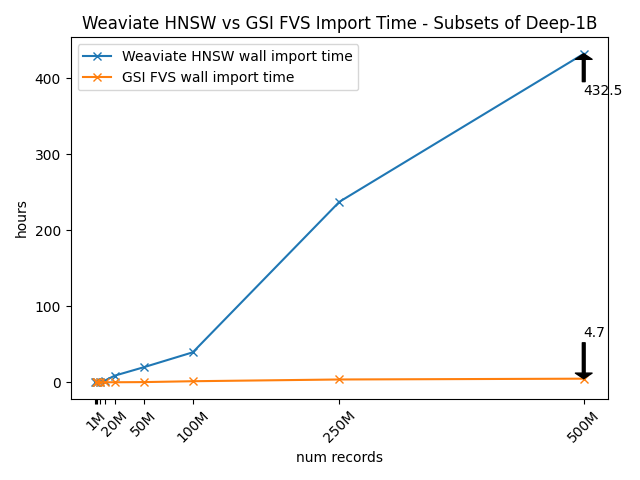

In [12]:
# Plot import/train times

# compute average train time via groupby
avg_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['import_time'].mean()

# compute average wall import time via groupby
avg_wall_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['wall_time'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_import_time.index:
    x = idx
    xs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("hnsw train time", xs,ys)

# get the plot points for wall import time
wxs = []
wys = []
for idx in avg_wall_import_time.index:
    x = idx
    wxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wys.append(y)
print("hnw wall import time", wxs,wys)

avg_import_time = \
    summary_gsi_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_gsi_df.groupby(['numrecs'])['wall_time'].mean()
xgs = []
ygs = []
for idx in avg_import_time.index:
    x = idx
    xgs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ygs.append(y)
print("fvs wall import time", xgs,ygs)

wxgs = []
wygs = []
for idx in avg_wall_import_time.index:
    x = idx
    wxgs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wygs.append(y)
print("fvs wall import time", wxgs,wygs)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
#ax.plot(xs,ys, marker='x', label="import time")
ax.plot(wxs,wys, marker='x', label="Weaviate HNSW wall import time")
#ax.plot(xgs,ygs, marker='x', label="gsi import time")
ax.plot(wxgs,wygs, marker='x', label="GSI FVS wall import time")
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
#ax.set_xticklabels(['10K','1M', '2M', '5M', '10M', '20M', '50M', '100M', '250M', '500M'], rotation = 45)
ax.set_xticklabels(['', '1M','','','', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
hnsw_hours = "%.1f" % wys[-1]
ax.annotate(hnsw_hours, xy=(wxs[-1],wys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )
gsi_hours = "%.1f" % wygs[-1]
ax.annotate(gsi_hours, xy=(wxgs[-1],wygs[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("Weaviate HNSW vs GSI FVS Import Time - Subsets of Deep-1B")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/weaviate_hnsw_vs_fvs_wall_import_time_ad.png")

# TODO:  plot the variance at each X

In [15]:
def format_size(size):
    if size < 1000000:      
        return str(size)[:-3]+'K'
    elif size < 1000000000:
        return str(size)[:-6]+'M'
    else:
        return str(size)[:-9]+'B'

def unformat_size(size):
    if size[-1] == 'K':
        return int(size[:-1]) * 1000
    elif size[-1] == 'M':
        return int(size[:-1]) * 1000000
    else:
        return int(size[:-1]) * 1000000000

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…

interactive(children=(Checkbox(value=False, description='GSI_pareto'), Output()), _dom_classes=('widget-intera…

interactive(children=(Checkbox(value=False, description='Weaviate_pareto'), Output()), _dom_classes=('widget-i…

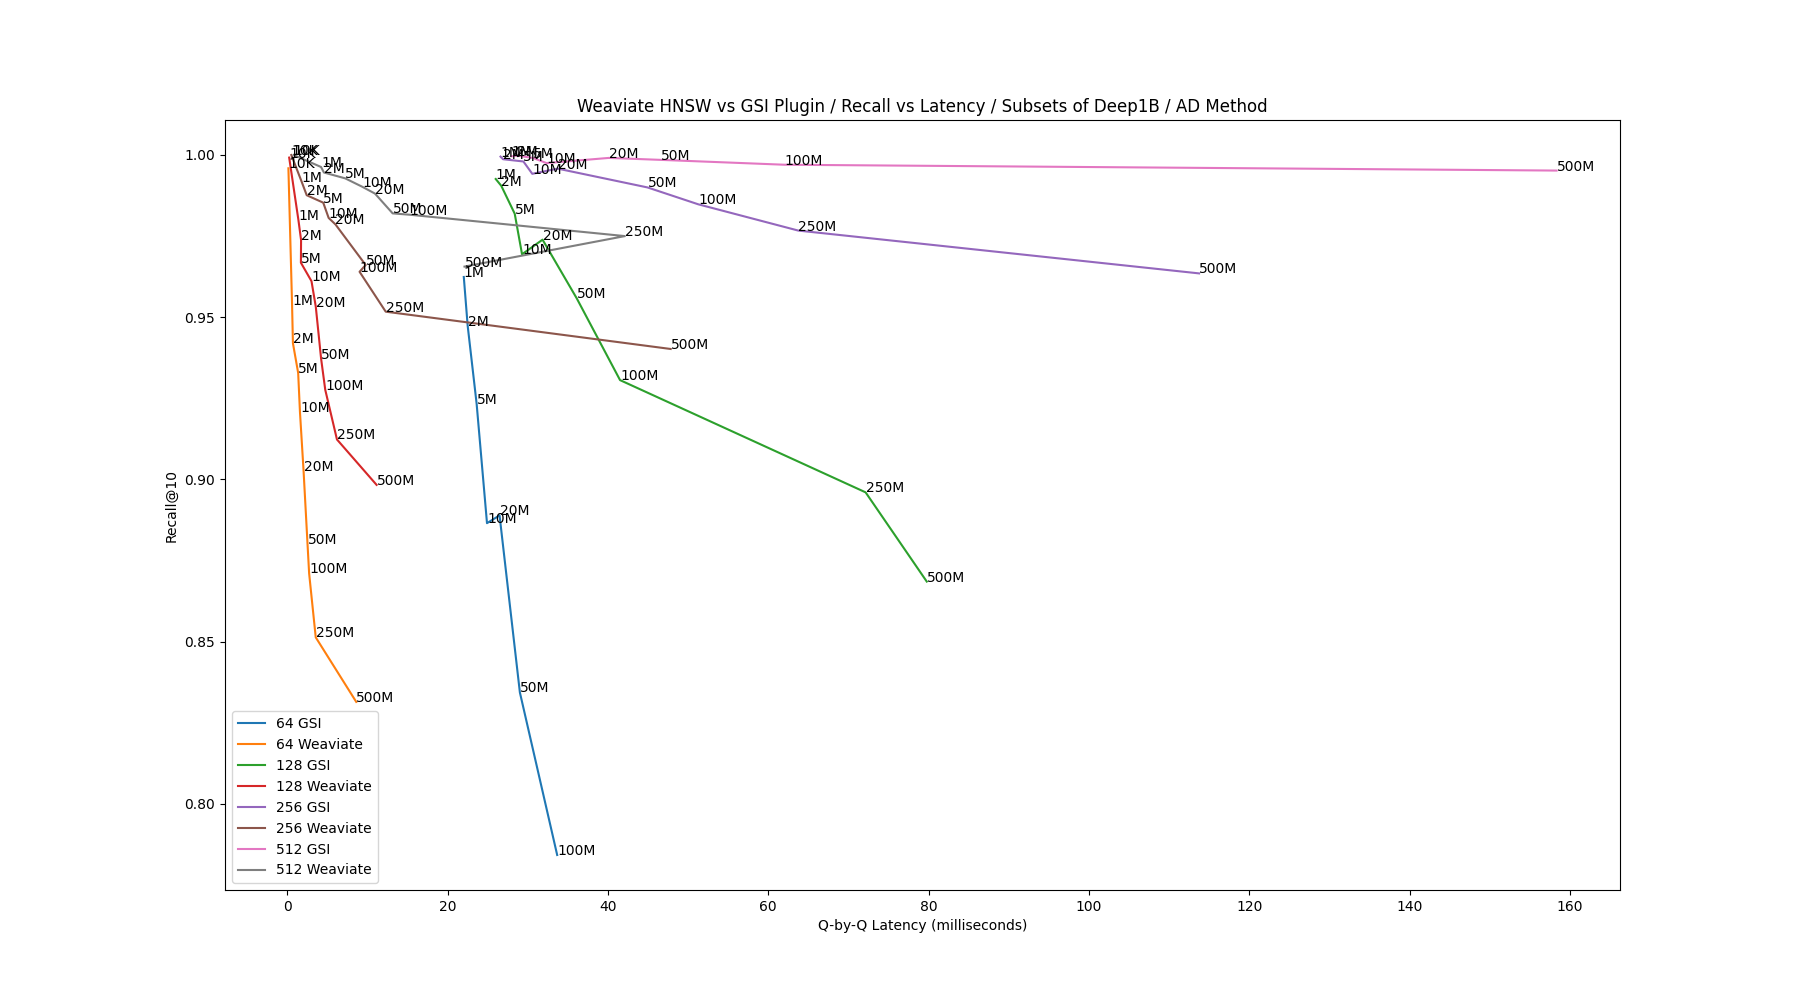

In [16]:
ann_list, lines = [], []
gsi_pareto_list, pareto_list = [], []
def set_graph(a):
    global ann_list
    global lines
    for ef in summary_gsi_df.bits.unique():
        tmp = summary_gsi_df[summary_gsi_df.bits == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + ' GSI', alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        tmp = summary_df[summary_df.ef == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + " Weaviate", alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))

fig, ax = plt.subplots(figsize=(18,10))
@widgets.interact(a=(0,1,0.1))
def update(a=1.0):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    set_graph(a)

gsi_pareto_list = []
@widgets.interact(GSI_pareto=False)
def show_gsi_pareto(GSI_pareto):
    global gsi_pareto_list
    if GSI_pareto:
        for size in summary_gsi_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_gsi_df[summary_gsi_df.numrecs == size]
            gsi_pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in gsi_pareto_list]
        gsi_pareto_list = []

pareto_list = []
@widgets.interact(Weaviate_pareto=False)
def show_weav_pareto(Weaviate_pareto):
    global pareto_list
    if Weaviate_pareto:
        for size in summary_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_df[summary_df.numrecs == size]
            pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in pareto_list if len(line) > 0]
        pareto_list = []


ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW vs GSI Plugin / Recall vs Latency / Subsets of Deep1B / AD Method")
ax.legend()

In [18]:
# select 1 dataset size
# colored pareto front

In [40]:
from ipywidgets import Layout, HBox
from IPython.display import clear_output

In [44]:
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'pink', 'teal', 'orange', 'brown', 'gray']
def set_graph(change):
    update(change)
    global ann_list
    global lines
    global weav
    global gsi
    global p_mode

    if change['new'] == ('GSI', ):
        gsi, weav = True, False
        return
    elif change['new'] == ('Weaviate', ):
        gsi, weav = False, True
        return
    elif change['new'] == ('GSI', 'Weaviate'):
        gsi, weav = True, True
        return
    
    if type(change['new']) == bool:
        p_mode = not p_mode
        return
    
    lines = []
    ann_list = []
    if p_mode:
        for color, size in enumerate(change['new']):
            if gsi:
                tmp = summary_gsi_df[summary_gsi_df.numrecs == unformat_size(size)]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=str(size) + ' GSI', color=colors[color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.bits):
                    ann_list.append(plt.annotate(s, (i,j)))
            if weav:
                tmp = summary_df[summary_df.numrecs == unformat_size(size)]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=str(size) + ' Weaviate', color=colors[::-1][color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.ef):
                    ann_list.append(plt.annotate(s, (i,j)))
    else:
        for color, ef in enumerate(summary_gsi_df.bits.unique()):
            if gsi:
                tmp = summary_gsi_df[(summary_gsi_df.bits == ef) & (summary_gsi_df.numrecs.isin([unformat_size(x) for x in change['new']]))]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label = str(ef) + ' GSI', color=colors[color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
                    ann_list.append(plt.annotate(format_size(s), (i,j)))
            if weav:
                tmp = summary_df[(summary_df.ef == ef) & (summary_df.numrecs.isin([unformat_size(x) for x in change['new']]))]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label = "ef = " + str(ef), color=colors[::-1][color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
                    ann_list.append(plt.annotate(format_size(s), (i,j)))
    ax.legend()

def update(change):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    plt.close(0)


In [45]:
sm = widgets.SelectMultiple(
    options = ['GSI', 'Weaviate'],
    layout=Layout(height='50px', width='100px')
)
sm_size = widgets.SelectMultiple(
    options=[format_size(size) for size in sizes],
    layout=Layout(width='40px', height='180px')
)
pareto = widgets.Checkbox(
    value=False,
    description='pareto mode'
)

def on_value_change(change):
    print(change['new'])
    print('change: ', change)

sm.observe(set_graph, names='value')
sm_size.observe(set_graph, names='value')
pareto.observe(set_graph, names='value')
weav, gsi, p_mode = False, False, False
fig, ax = plt.subplots(figsize=(17,10))
ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW / Recall vs Latency / Subsets of Deep1B")
ax.legend()
HBox([sm, sm_size, pareto])


NameError: name 'format_size' is not defined

In [22]:
#
# Individual Paretto front graphs
#


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean   import_time     wall_time
9    64  500000000         0.8314     8.593629  1.556734e+06  1.556877e+06
19  128  500000000         0.8983    11.130874  1.556734e+06  1.556877e+06
29  256  500000000         0.9402    47.821046  1.556734e+06  1.556877e+06
39  512  500000000         0.9656    22.098475  1.556734e+06  1.556877e+06
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
15   128  500000000         0.8685    79.771007  24141.563112  24141.563170
24   256  500000000         0.9635   113.749056    661.277671    661.277726
33   512  500000000         0.9952   158.350539  26066.118713  26066.118766
[8.593629, 11.130873999999999, 47.821045999999996, 22.098475] [0.8313999999999975, 0.8982999999999967, 0.9401999999999977, 0.9655999999999983]
[79.77100700000001, 113.749056, 158.35053900000003] [0.8684999999999959, 0.9634999999999969, 0.9951999999999992]


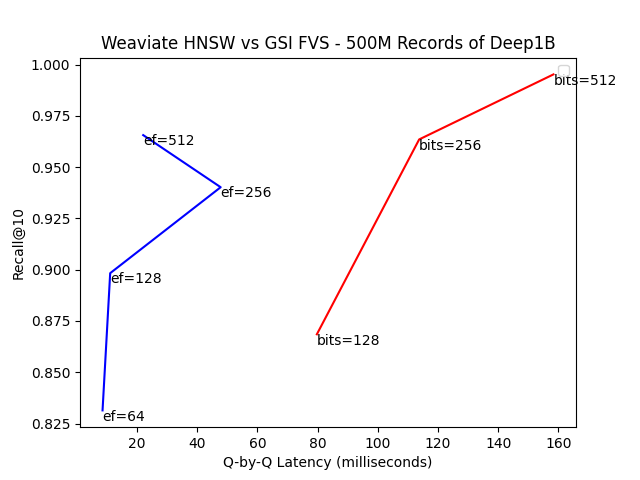

In [23]:
# 500M

# get dataframes for 500M
df_hnsw_500M = summary_df[ summary_df['numrecs']==500000000 ]
print(df_hnsw_500M)
df_gsi_500M = summary_gsi_df[ summary_gsi_df['numrecs']==500000000 ]
print(df_gsi_500M)

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_500M['ef'])
paretto_hnsw_search = list(df_hnsw_500M['search_mean'])
paretto_hnsw_recall = list(df_hnsw_500M['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_500M['bits'])
paretto_gsi_search = list(df_gsi_500M['search_mean'])
paretto_gsi_recall = list(df_gsi_500M['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 500M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_500M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean    import_time      wall_time
8    64  250000000         0.8513     3.538584  855149.766747  855279.656859
18  128  250000000         0.9123     6.187096  855149.766747  855279.656859
28  256  250000000         0.9517    12.269014  855149.766747  855279.656859
38  512  250000000         0.9750    42.109806  855149.766747  855279.656859
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
14   128  250000000         0.8960    72.141179  13419.462200  13419.462247
23   256  250000000         0.9767    63.741886  12914.538628  12914.538675
32   512  250000000         0.9961   110.187049           NaN           NaN
[3.538584, 6.187096, 12.269014, 42.109806] [0.8512999999999974, 0.9122999999999973, 0.9516999999999978, 0.9749999999999986]
[72.141179, 63.741886, 110.1870485] [0.8959999999999958, 0.9766999999999975, 0.9960999999999995]


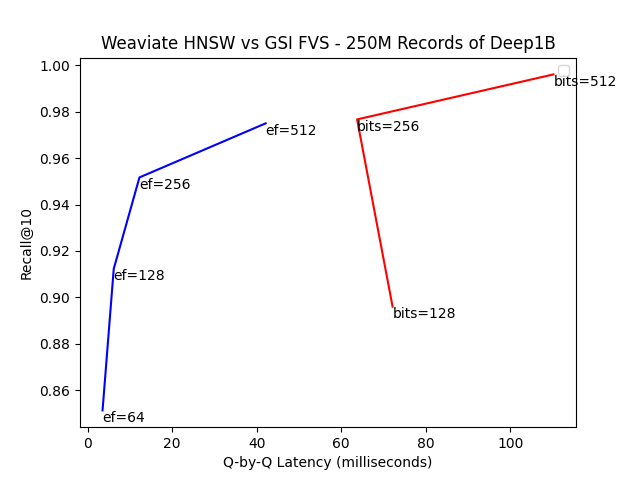

In [24]:
# 250M

# get dataframes for 250M
df_hnsw_250M = summary_df[ summary_df['numrecs']==250000000 ]
print(df_hnsw_250M )
df_gsi_250M  = summary_gsi_df[ summary_gsi_df['numrecs']==250000000 ]
print(df_gsi_250M )

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_250M ['ef'])
paretto_hnsw_search = list(df_hnsw_250M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_250M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_250M ['bits'])
paretto_gsi_search = list(df_gsi_250M ['search_mean'])
paretto_gsi_recall = list(df_gsi_250M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 250M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_250M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean    import_time     wall_time
7    64  100000000         0.8710     2.715001  141989.792003  142015.02986
17  128  100000000         0.9276     4.726823  141989.792003  142015.02986
27  256  100000000         0.9640     9.006533  141989.792003  142015.02986
37  512  100000000         0.9816    15.211395  141989.792003  142015.02986
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
14   128  250000000         0.8960    72.141179  13419.462200  13419.462247
23   256  250000000         0.9767    63.741886  12914.538628  12914.538675
32   512  250000000         0.9961   110.187049           NaN           NaN
[2.715001, 4.7268229999999996, 9.006533000000001, 15.211395000000001] [0.870999999999997, 0.9275999999999972, 0.9639999999999976, 0.9815999999999984]
[33.66181, 41.506008, 51.262914, 62.023557999999994] [0.7841999999999973, 0.9305999999999961, 0.9847999999999982, 0.9969999999999999]


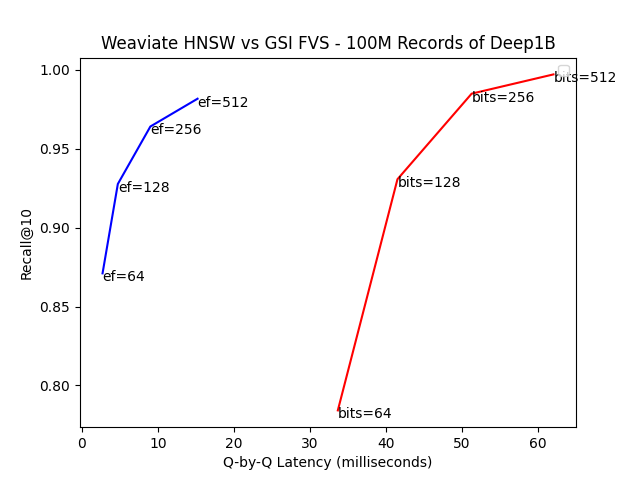

In [28]:
# 100M

# get dataframes for 100M
df_hnsw_100M = summary_df[ summary_df['numrecs']==100000000 ]
print(df_hnsw_100M )
df_gsi_100M  = summary_gsi_df[ summary_gsi_df['numrecs']==100000000 ]
print(df_gsi_250M )

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_100M ['ef'])
paretto_hnsw_search = list(df_hnsw_100M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_100M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_100M ['bits'])
paretto_gsi_search = list(df_gsi_100M ['search_mean'])
paretto_gsi_recall = list(df_gsi_100M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 100M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_100M.png")